In [23]:
import pandas as pd
import numpy as np

In [24]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data cleaning

In [25]:
cars.replace("?", np.nan, inplace=True)

In [26]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [27]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [28]:
numeric_cars = numeric_cars.astype(float)

In [29]:
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [30]:
numeric_cars['normalized-losses'].isnull().sum()

41

In [31]:
numeric_cars.shape[0]

205

In [32]:
41 / 205

0.2

In [33]:
numeric_cars = numeric_cars.dropna(subset=['price'])

In [34]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [35]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [36]:
norm_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
norm_cars['price'] = numeric_cars['price']

# Univariate model

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(col, target, df):
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    np.random.seed(1)
    
    split_row = int(df.shape[0] / 2)
    
    train = df[:split_row]
    test = df[split_row:]
    
    knn = KNeighborsRegressor()
    knn.fit(train[[col]], train[target])
    predicted = knn.predict(test[[col]])
    mse = mean_squared_error(test[target], predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [51]:
columns = norm_cars.columns.tolist()
columns.remove('price')
columns

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'bore',
 'stroke',
 'compression-rate',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [55]:
rmse_per_cols = {}
for col in columns:
    rmse = knn_train_test(col, 'price', norm_cars)
    rmse_per_cols[col] = rmse

In [56]:
rmse_per_cols

{'bore': 6780.627784685976,
 'city-mpg': 4766.422505090134,
 'compression-rate': 6610.812153159129,
 'curb-weight': 4401.118254793124,
 'height': 8144.441042663747,
 'highway-mpg': 4630.026798588056,
 'horsepower': 4037.0377131537603,
 'length': 5427.2009608367125,
 'normalized-losses': 7330.197653434445,
 'peak-rpm': 7697.4596964334805,
 'stroke': 8006.529544647101,
 'wheel-base': 5461.553997873057,
 'width': 4704.482589704386}

In [57]:
def knn_train_test2(col, target, df, k):
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    np.random.seed(1)
    
    split_row = int(df.shape[0] / 2)
    
    train = df[:split_row]
    test = df[split_row:]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[[col]], train[target])
    predicted = knn.predict(test[[col]])
    mse = mean_squared_error(test[target], predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [60]:
k_v_rmse = {}

for col in columns:
    rmse_dic = {}
    for k in range(1,10,2):
        rmse = knn_train_test2(col, 'price', norm_cars, k)
        rmse_dic[k] = rmse
    
    k_v_rmse[col] = rmse_dic
        

In [75]:
k_v_rmse

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

height
{1: 8904.04645636071, 3: 8277.609643045525, 9: 7811.03606291223, 5: 8144.441042663747, 7: 7679.598124393773}
stroke
{1: 9116.495955406906, 3: 7338.68466990294, 9: 7735.554366079291, 5: 8006.529544647101, 7: 7803.937796804327}
width
{1: 4559.257297950061, 3: 4606.413692169901, 9: 4652.914172067787, 5: 4704.482589704386, 7: 4571.485046194653}
city-mpg
{1: 5901.143574354764, 3: 4646.746408727155, 9: 5465.209492527533, 5: 4766.422505090134, 7: 5232.523034167316}
wheel-base
{1: 4493.734068810494, 3: 5120.161506064513, 9: 5738.405685192312, 5: 5461.553997873057, 7: 5448.1070513823315}
compression-rate
{1: 8087.205346523092, 3: 7375.063685578359, 9: 7024.485525463435, 5: 6610.812153159129, 7: 6732.801282941515}
peak-rpm
{1: 9511.480067750124, 3: 8537.550899973421, 9: 7340.041341263401, 5: 7697.4596964334805, 7: 7510.294160083481}
normalized-losses
{1: 7846.750605148984, 3: 7500.5698123109905, 9: 7688.096096891432, 5: 7330.197653434445, 7: 7756.421586234123}
horsepower
{1: 4170.05484803

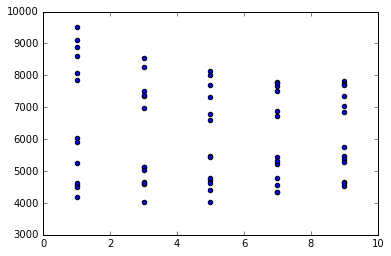

In [76]:
for k, v in k_v_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    print(k)
    print(v)
    
    plt.scatter(x, y)
    


# Multivariate model

In [78]:
def knn_train_test3(cols, target, df, k):
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    np.random.seed(1)
    
    split_row = int(df.shape[0] / 2)
    
    train = df[:split_row]
    test = df[split_row:]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[cols], train[target])
    predicted = knn.predict(test[cols])
    mse = mean_squared_error(test[target], predicted)
    rmse = np.sqrt(mse)
    
    return rmse

In [80]:
cols_rmse = {}
for k, v in k_v_rmse.items():
    cols_rmse[k] = np.mean(list(v.values()))

In [81]:
cols_rmse

{'bore': 7222.472445325499,
 'city-mpg': 5202.40900297338,
 'compression-rate': 7166.0735987331045,
 'curb-weight': 4730.075815236338,
 'height': 8163.346265875196,
 'highway-mpg': 5069.469256447656,
 'horsepower': 4219.377860395267,
 'length': 5176.394903761173,
 'normalized-losses': 7624.407150803995,
 'peak-rpm': 8119.365233100782,
 'stroke': 8000.240466568112,
 'wheel-base': 5252.3924618645415,
 'width': 4618.910559617357}

In [82]:
two_best = ['horsepower', 'width']
knn_train_test3(two_best, 'price', norm_cars, 5)

3589.3132622073304

In [84]:
three_best = ['horsepower', 'width', 'curb-weight']
knn_train_test3(three_best, 'price', norm_cars, 5)

3305.9401397969677

In [88]:
four_best = ['horsepower', 'width', 'curb-weight', 'city-mpg']
knn_train_test3(four_best, 'price', norm_cars, 5)

3280.3807311630976

In [89]:
five_best = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
knn_train_test3(five_best, 'price', norm_cars, 5)

3341.6024539726504

# Hyperparameter tuning

In [99]:
var_dic = {}
best_vars = [three_best, four_best, five_best]

for i, var in enumerate(best_vars):
    

    rmse_dic = {}
    for k in range(1,25):
        rmse = knn_train_test3(var, 'price', norm_cars, k)
        rmse_dic[k] = rmse
    dic_name = str(i + 3) + " best"  
    var_dic[dic_name] = rmse_dic

In [100]:
var_dic

{'3 best': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868,
  16: 4394.4846551644205,
  17: 4510.399710057406,
  18: 4584.310961865486,
  19: 4636.62620477063,
  20: 4664.465847866811,
  21: 4724.096637428273,
  22: 4752.535484102914,
  23: 4808.703310452101,
  24: 4858.9452710176065},
 '4 best': {1: 2516.589279950226,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.269482641261,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.998621362245,
  10: 4042.247226187899,
  11: 4230.335248684068,
  12: 4354.008675154061,
  13: 4461.626664877788,
  14: 4468.029845088927,
  15: 4444.164407677133,
  16: 4492.0